# Series Temporales: Accidentes Barcelona

Importamos librerias necesarias:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from datetime import date, datetime
import matplotlib
import statsmodels.api as sm
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Utilizamos la base trabajada para el analisis de R, donde tenemos la cantidad de accidentes y las fechas

In [3]:
df = pd.read_csv('baseST.csv', encoding='latin-1')
df.head()

Unnamed: 0  desc_fecha    horario  cant_accidentes  id_desc_dia_semana  \
0           1  2015-01-01  madrugada                1                   4   
1           2  2015-01-01     mañana                4                   4   
2           3  2015-01-01      noche                2                   4   
3           4  2015-01-01      tarde                5                   4   
4           5  2015-01-02     mañana                5                   4   

  estacion precipitacion temperatura viento  
0   winter     No llueve        Frio   Bajo  
1   winter     No llueve        Frio   Bajo  
2   winter     No llueve        Frio   Bajo  
3   winter     No llueve        Frio   Bajo  
4   winter     No llueve        Frio   Bajo

Corregimos el formato de 'desc_fecha' para que sea datetime

In [4]:
def formato_fecha(fila):
    a = datetime.strptime(fila.desc_fecha,'%Y-%m-%d')
    return a
    
df['desc_fecha'] = df.apply(formato_fecha, axis=1)
df.dtypes

Unnamed: 0                     int64
desc_fecha            datetime64[ns]
horario                       object
cant_accidentes                int64
id_desc_dia_semana             int64
estacion                      object
precipitacion                 object
temperatura                   object
viento                        object
dtype: object

Revisamos la fecha maxima y minima para validar que estamos trabajando desde enero 2015 hasta diciembre 2017.

In [5]:
df['desc_fecha'].min(), df['desc_fecha'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

Nos quedamos unicamente con cantidad de accidentes y fechas 

In [6]:
cols = ['id_desc_dia_semana', 'estacion', 'precipitacion', 'temperatura', 'viento']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('desc_fecha')
df.isnull().sum()

Unnamed: 0         0
desc_fecha         0
horario            0
cant_accidentes    0
dtype: int64

Agrupamos todas los accidentes por dia 

In [7]:
df = df.groupby('desc_fecha')['cant_accidentes'].sum().reset_index()
df.head()

desc_fecha  cant_accidentes
0 2015-01-01               12
1 2015-01-02               15
2 2015-01-03               14
3 2015-01-04               16
4 2015-01-05               31

Indexamos las fecha

In [8]:
df = df.set_index('desc_fecha')
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='desc_fecha', length=1089, freq=None)

In [9]:
y = df['cant_accidentes'].resample('MS').sum().round()
y.head()

desc_fecha
2015-01-01    783
2015-02-01    791
2015-03-01    870
2015-04-01    791
2015-05-01    924
Freq: MS, Name: cant_accidentes, dtype: int64

In [10]:
y['2017':]

desc_fecha
2017-01-01    844
2017-02-01    824
2017-03-01    935
2017-04-01    843
2017-05-01    962
2017-06-01    908
2017-07-01    918
2017-08-01    652
2017-09-01    769
2017-10-01    927
2017-11-01    991
2017-12-01    762
Freq: MS, Name: cant_accidentes, dtype: int64

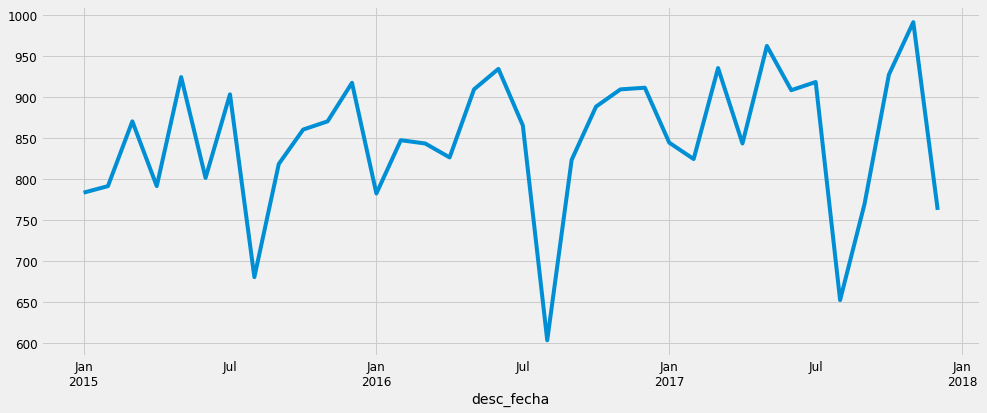

In [11]:
y.plot(figsize=(15, 6))
plt.show()

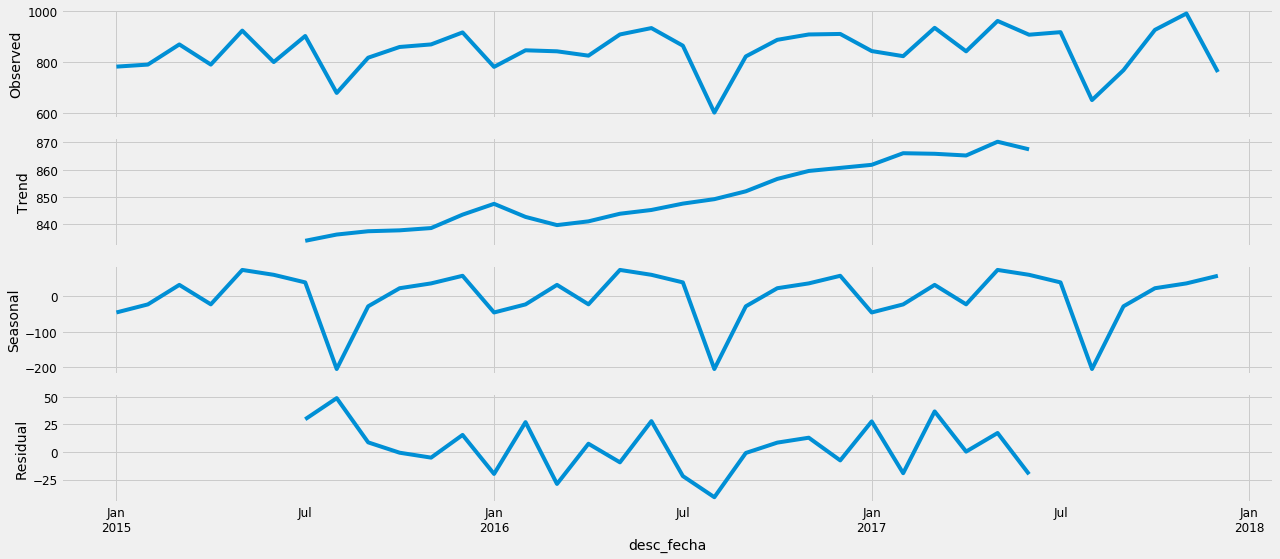

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()